In [1]:
# Install necessary libraries
!pip install rasterio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 51.1 MB/s eta 0:00:00


In [3]:
!git clone https://github.com/yohanesnuwara/starting-computer-vision

Cloning into 'starting-computer-vision'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 46 (delta 18), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (46/46), 17.91 MiB | 4.89 MiB/s, done.


In [4]:
# # Download TFF image 
# !wget https://github.com/yohanesnuwara/starting-computer-vision/raw/main/data/palmaOrthoTotal_14cm.tif

In [5]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show

In [6]:
# Open TIF image using rasterio
im = rasterio.open("/content/starting-computer-vision/data/palmaOrthoTotal_14cm.tif")

print(im)

<open DatasetReader name='/content/starting-computer-vision/data/palmaOrthoTotal_14cm.tif' mode='r'>


/usr/local/lib/python3.9/dist-packages/rasterio/plot.py:112: NodataShadowWarning: The dataset's nodata attribute is shadowing the alpha band. All masks will be determined by the nodata attribute
  arr = source.read(rgb_indexes, masked=True)


<AxesSubplot:>

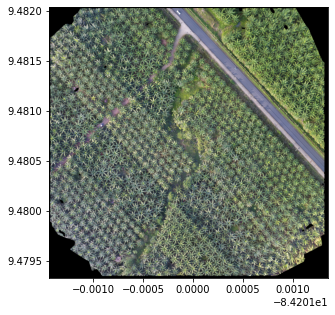

In [7]:
# Show TIF image
fig, ax = plt.subplots(1, 1, figsize=(5,5))
show(im, transform=im.transform, ax=ax)

In [9]:
# Print CRS and coordinate bounds
print(im.crs)
print(im.bounds)

EPSG:4326
BoundingBox(left=-84.202437401, bottom=9.479328778, right=-84.199647927, top=9.482037704)


Raster image is an array

In [13]:
# Decode TIF file into Numpy array
im_arr = im.read()

print(im_arr)
print(im_arr.shape)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
(4, 2144, 2207)


(l,m,n) where l is channels, m is height in pixels, n is height in pixels

In [14]:
# Swap the position of channel to the last dimension
im_new = np.swapaxes(im_arr, 0, 2)

print(im_new.shape)

(2207, 2144, 4)


The 4 channels are B, G, R, transparency

In [15]:
# Extract each channel
band_B = im_new[...,0]
band_G = im_new[...,1]
band_R = im_new[...,2]
band_tran = im_new[...,3]

# Print one channel
print(band_B)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Transposing the array to get the correct display

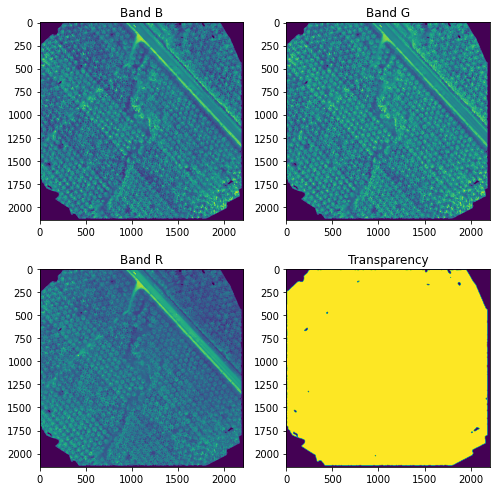

In [16]:
# Display each band
plt.figure(figsize=(7,7))

plt.subplot(2,2,1)
plt.imshow(band_B.T)
plt.title("Band B")

plt.subplot(2,2,2)
plt.imshow(band_G.T)
plt.title("Band G")

plt.subplot(2,2,3)
plt.imshow(band_R.T)
plt.title("Band R")

plt.subplot(2,2,4)
plt.imshow(band_tran.T)
plt.title("Transparency")

plt.tight_layout()
plt.show()

(2144, 2207, 3)


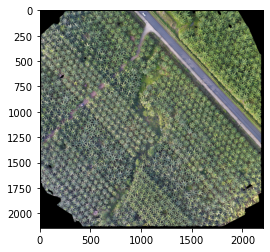

In [17]:
# Display the RGB image
im_rgb = im_new[...,:3]
im_rgb = np.swapaxes(im_rgb, 0, 1)
print(im_rgb.shape)

plt.imshow(im_rgb)
plt.show()

Create tile of raster

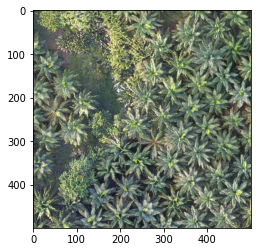

In [19]:
# Tile 500x500 pixels
im_tile = im_rgb[1000:1500,1000:1500,:]

plt.imshow(im_tile)